In [4]:
import pandas as pd
import numpy as np
import json

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
users_data_path = r"C:\Users\soura\OneDrive\Desktop\Projects\Fraud Detection\data\users_data.csv"
transactions_data_path = r"C:\Users\soura\OneDrive\Desktop\Projects\Fraud Detection\data\transactions_data.csv"
card_data_path = r"C:\Users\soura\OneDrive\Desktop\Projects\Fraud Detection\data\cards_data.csv"
mcc_codes_path = r"C:\Users\soura\OneDrive\Desktop\Projects\Fraud Detection\data\mcc_codes.json"
fraud_labels_path = r"C:\Users\soura\OneDrive\Desktop\Projects\Fraud Detection\data\train_fraud_labels.json"

In [6]:
card_data_df = pd.read_csv(card_data_path)

In [7]:
card_data_df.shape

(6146, 13)

In [8]:
card_data_df.head()

,id,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web
0,4524,825,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No
1,2731,825,Visa,Debit,4956965974959986,12/2020,393,YES,2,$21968,04/2014,2014,No
2,3701,825,Visa,Debit,4582313478255491,02/2024,719,YES,2,$46414,07/2003,2004,No
3,42,825,Visa,Credit,4879494103069057,08/2024,693,NO,1,$12400,01/2003,2012,No
4,4659,825,Mastercard,Debit (Prepaid),5722874738736011,03/2009,75,YES,1,$28,09/2008,2009,No


In [9]:
# Renaming in card_data_df
card_data_df.rename(columns={'id': 'card_id'}, inplace=True)

In [10]:
card_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6146 entries, 0 to 6145
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   card_id                6146 non-null   int64 
 1   client_id              6146 non-null   int64 
 2   card_brand             6146 non-null   object
 3   card_type              6146 non-null   object
 4   card_number            6146 non-null   int64 
 5   expires                6146 non-null   object
 6   cvv                    6146 non-null   int64 
 7   has_chip               6146 non-null   object
 8   num_cards_issued       6146 non-null   int64 
 9   credit_limit           6146 non-null   object
 10  acct_open_date         6146 non-null   object
 11  year_pin_last_changed  6146 non-null   int64 
 12  card_on_dark_web       6146 non-null   object
dtypes: int64(6), object(7)
memory usage: 624.3+ KB


In [11]:
# Descriptive statistics for numerical columns
card_data_df.describe()

,card_id,client_id,card_number,cvv,num_cards_issued,year_pin_last_changed
count,6146.000000,6146.000000,6.146000e+03,6146.000000,6146.000000,6146.000000
mean,3072.500000,994.939636,4.820426e+15,506.220794,1.503091,2013.436707
std,1774.341709,578.614626,1.328582e+15,289.431123,0.519191,4.270699
min,0.000000,0.000000,3.001055e+14,0.000000,1.000000,2002.000000
25%,1536.250000,492.250000,4.486365e+15,257.000000,1.000000,2010.000000
50%,3072.500000,992.000000,5.108957e+15,516.500000,1.000000,2013.000000
75%,4608.750000,1495.000000,5.585237e+15,756.000000,2.000000,2017.000000
max,6145.000000,1999.000000,6.997197e+15,999.000000,3.000000,2020.000000


In [12]:
# Check unique values for categorical columns
print(card_data_df['card_brand'].value_counts())
print(card_data_df['card_type'].value_counts())
print(card_data_df['has_chip'].value_counts())
print(card_data_df['card_on_dark_web'].value_counts())


card_brand
Mastercard    3209
Visa          2326
Amex           402
Discover       209
Name: count, dtype: int64
card_type
Debit              3511
Credit             2057
Debit (Prepaid)     578
Name: count, dtype: int64
has_chip
YES    5500
NO      646
Name: count, dtype: int64
card_on_dark_web
No    6146
Name: count, dtype: int64


In [13]:
# Check for missing values
print(card_data_df.isnull().sum())


card_id                  0
client_id                0
card_brand               0
card_type                0
card_number              0
expires                  0
cvv                      0
has_chip                 0
num_cards_issued         0
credit_limit             0
acct_open_date           0
year_pin_last_changed    0
card_on_dark_web         0
dtype: int64


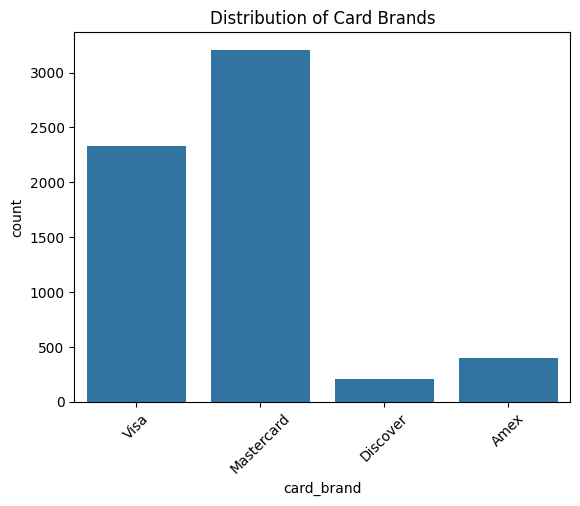

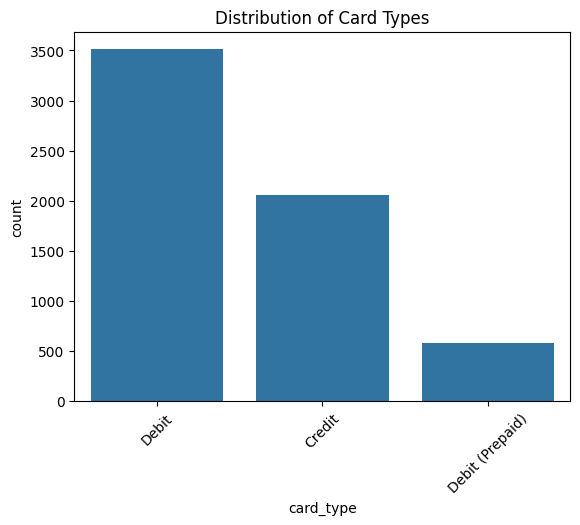

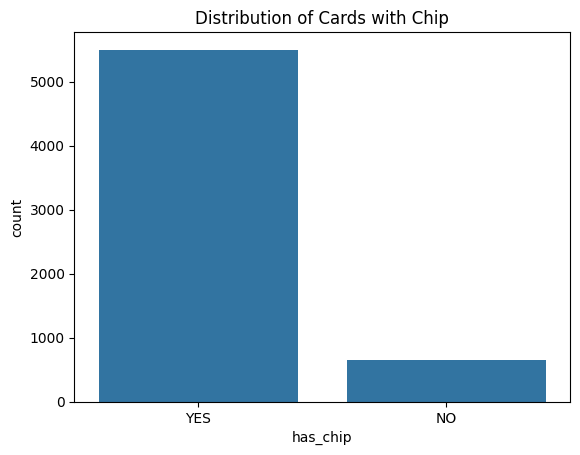

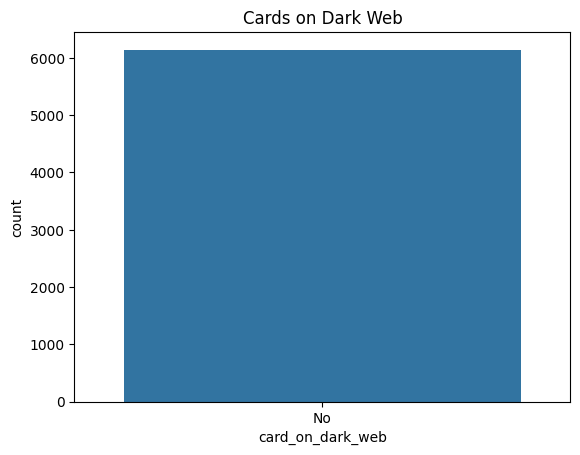

In [14]:
# Plot the distribution of categorical columns
sns.countplot(x='card_brand', data=card_data_df)
plt.title('Distribution of Card Brands')
plt.xticks(rotation=45)
plt.show()

sns.countplot(x='card_type', data=card_data_df)
plt.title('Distribution of Card Types')
plt.xticks(rotation=45)
plt.show()

sns.countplot(x='has_chip', data=card_data_df)
plt.title('Distribution of Cards with Chip')
plt.show()

sns.countplot(x='card_on_dark_web', data=card_data_df)
plt.title('Cards on Dark Web')
plt.show()

In [15]:
# Convert date columns to datetime
card_data_df['expires'] = pd.to_datetime(card_data_df['expires'], errors='coerce')
card_data_df['acct_open_date'] = pd.to_datetime(card_data_df['acct_open_date'], errors='coerce')

# Check the data types after conversion
print(card_data_df.dtypes)


card_id                           int64
client_id                         int64
card_brand                       object
card_type                        object
card_number                       int64
expires                  datetime64[ns]
cvv                               int64
has_chip                         object
num_cards_issued                  int64
credit_limit                     object
acct_open_date           datetime64[ns]
year_pin_last_changed             int64
card_on_dark_web                 object
dtype: object


C:\Users\soura\AppData\Local\Temp\ipykernel_13012\2215847634.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  card_data_df['expires'] = pd.to_datetime(card_data_df['expires'], errors='coerce')
C:\Users\soura\AppData\Local\Temp\ipykernel_13012\2215847634.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  card_data_df['acct_open_date'] = pd.to_datetime(card_data_df['acct_open_date'], errors='coerce')


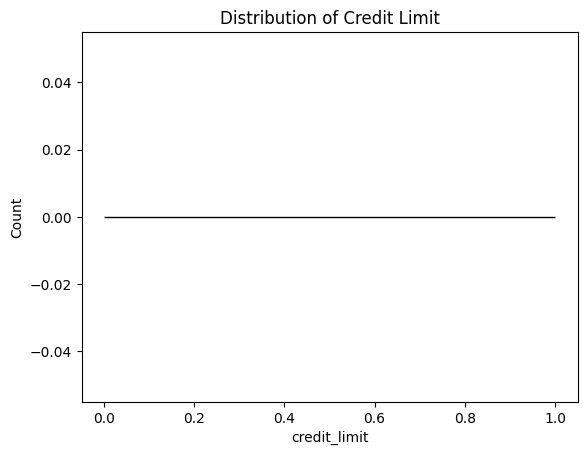

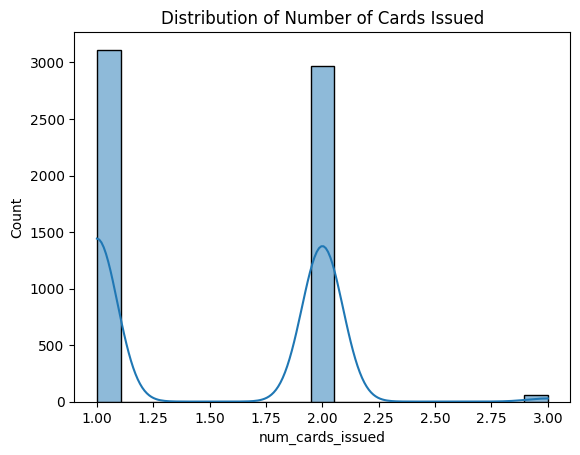

In [16]:
# Convert 'credit_limit' to numeric (if it's not already) and check for non-numeric entries
card_data_df['credit_limit'] = pd.to_numeric(card_data_df['credit_limit'], errors='coerce')

# Plot distribution of 'credit_limit' and 'num_cards_issued'
sns.histplot(card_data_df['credit_limit'], kde=True)
plt.title('Distribution of Credit Limit')
plt.show()

sns.histplot(card_data_df['num_cards_issued'], kde=True)
plt.title('Distribution of Number of Cards Issued')
plt.show()


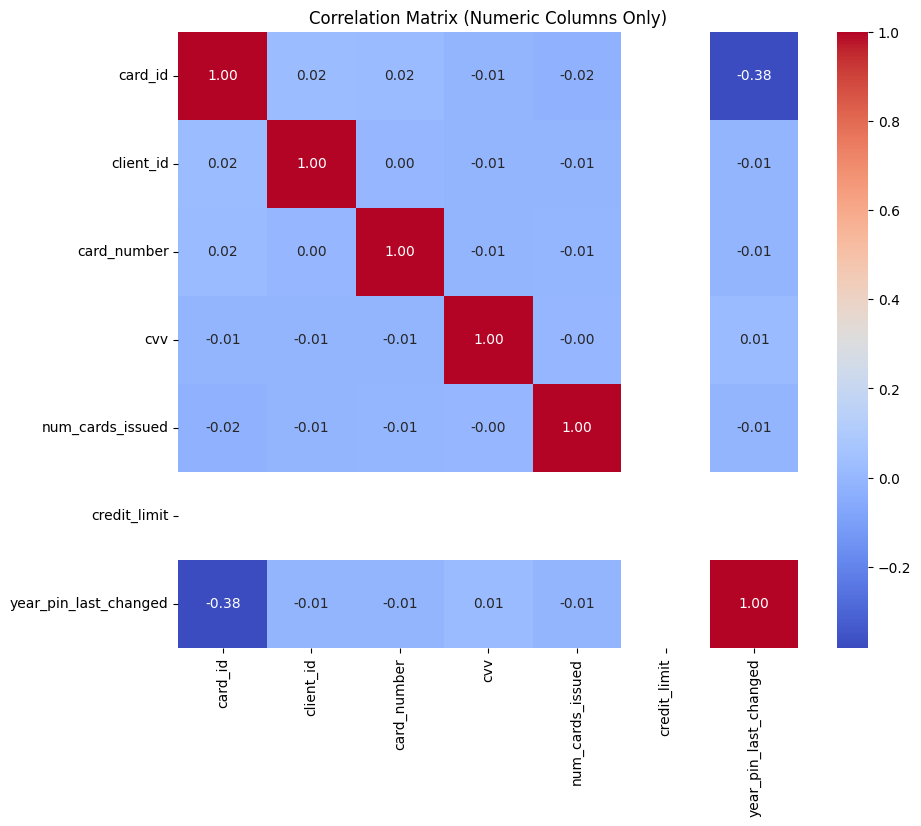

In [17]:
# Select only numeric columns
numeric_columns = card_data_df.select_dtypes(include=['number']).columns

# Calculate correlations for numeric columns only
correlation_matrix = card_data_df[numeric_columns].corr()

# Print the correlation matrix
# print(correlation_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix (Numeric Columns Only)')
plt.show()